In [13]:
!pip install -q requests_tor

In [1]:
def get_market_info(market_file_path):
    with open(market_file_path) as cookie_file:
        file_info = { line.split(' ')[0].strip(): line.split(' ')[1].strip() for line in cookie_file.readlines()}

        print(f"Loaded market with url '{file_info['Url']}' and cookie '{file_info['Cookie']}'")
        return file_info

Loaded market with url 'http://arche2mfayevbxxoapgc7ftt3nk3fm36dhfmw4caqmp6huwvtboympad.onion' and cookie Lyra=kcCD98wTreauf%2BLOPe9EOw5HEMShZ0OeDS7biFczoEoZSTkJX%2B5VMwO2jqcnmTl5mf3qPlnv638d0kUFaWaUDVrGiaFDA4919jMxBcf710vrGwcAtQn2hoPJUk4D4PUK2Hi1lRgAiDm946tKHQ6pTaEjQEnu%2FL07FyIZ%2Fx2DzDZnRR6MpQ00WGJTE2sw9qpq;
Fill in the numbers shown below and press the circle with a cut to enter<br><form method='POST' action='/enter'><input type='image' name='captcha' src=''><br><br><input type='text' name='captcha'></form>

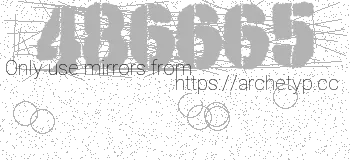

IndexError: list index out of range

In [22]:
from requests_tor import RequestsTor

rt = RequestsTor()

market_info = get_market_info('./marketinfo_archtyp.txt')

headers = {
    "Cookie": market_info['Cookie'],
}

r = rt.get(market_info['Url'] + '/market', headers=headers)
full_html = r.text
print(full_html)

users = full_html.split('All vendors')[1].split('</div>')[0].split('</option>')
usernames = [user.split('>')[1] for user in users[2:-1]]

In [25]:
for name in usernames:
    r = rt.get(arch_working_url+f'/u/{name}', headers=headers)
    full_html = r.text
    f = open(f"profile_archtype_{name}.txt", "w")
    f.write(full_html)
    f.close()
    print(f'finished writing profile: {name}')

finished writing profile: 0ldAmsterdam
finished writing profile: 1177
finished writing profile: 1Elle
finished writing profile: 3APES
finished writing profile: 420bob
finished writing profile: Abraxis
finished writing profile: ADHD
finished writing profile: ADHDfaen
finished writing profile: Agent001
finished writing profile: AJAXAMSTERDAM
finished writing profile: alluserstakenwtf
finished writing profile: Alphaprincess
finished writing profile: alpinechapo
finished writing profile: amigo27
finished writing profile: AmsterdamBULK
finished writing profile: AmsterrdamNL
finished writing profile: AMSTERXXXDAM
finished writing profile: AngieValencia
finished writing profile: apeman420
finished writing profile: ApexSupplies1
finished writing profile: Apocalypselabs
finished writing profile: apotekdirekt
finished writing profile: AREA51
finished writing profile: ARealDoctor
finished writing profile: AshWilliams
finished writing profile: AvbeaAU
finished writing profile: BanditenFS
finished 